Basic Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


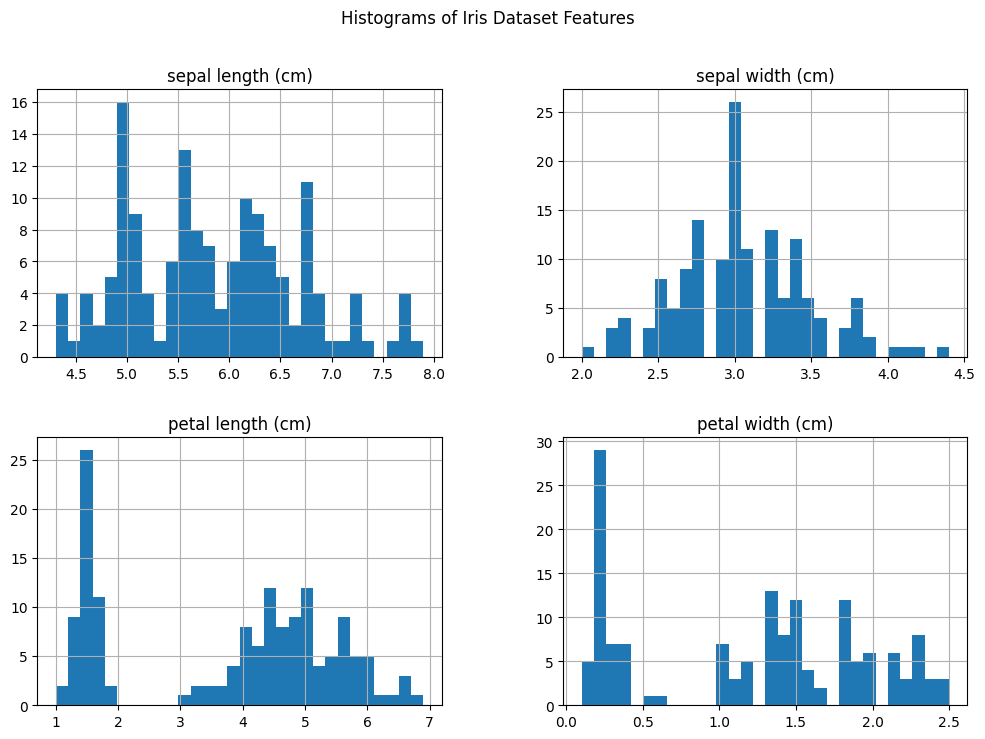

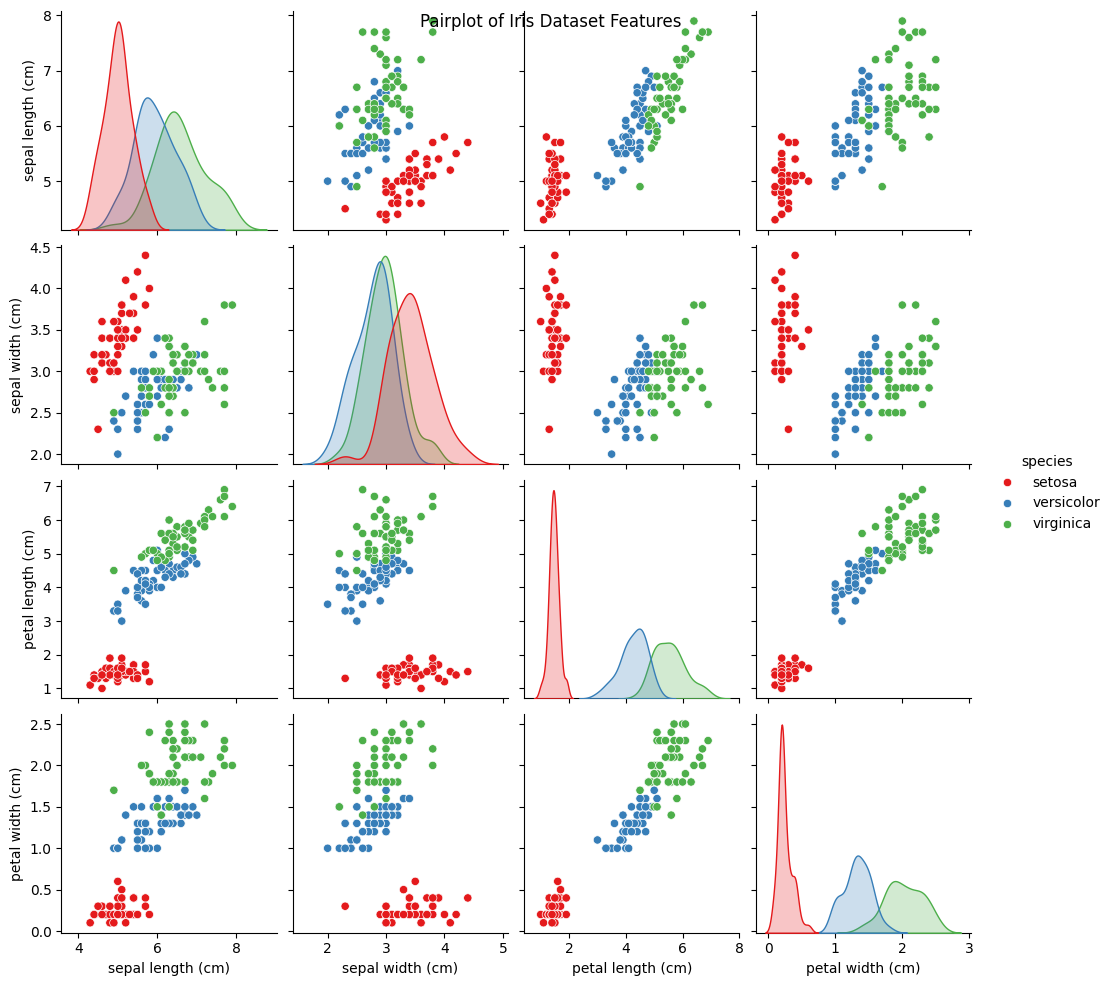

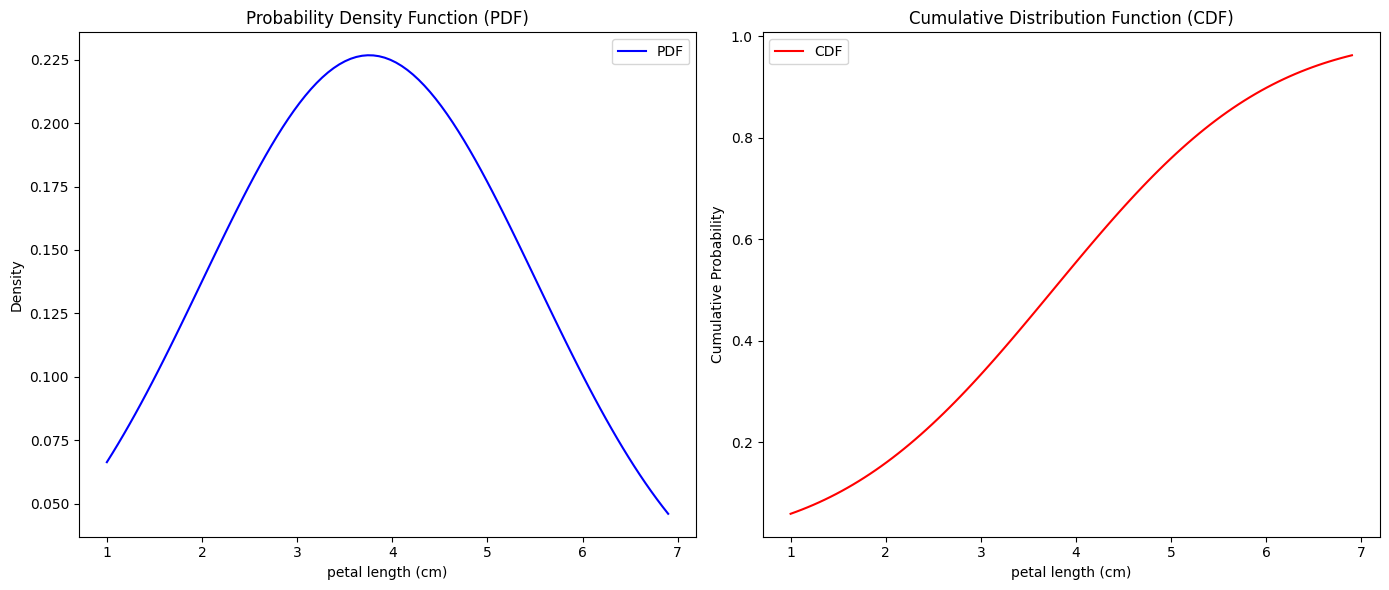

Probability Mass Function (PMF) for species:
species
setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: proportion, dtype: float64


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})  # Map numeric to string

# EDA: Display basic statistics
print("Basic Statistics:")
print(df.describe())

# Plot histograms for each feature
df.iloc[:, :-1].hist(bins=30, figsize=(12, 8))
plt.suptitle('Histograms of Iris Dataset Features')
plt.show()

# Plot pairplot for features colored by species
sns.pairplot(df, hue='species', palette='Set1')
plt.suptitle('Pairplot of Iris Dataset Features')
plt.show()

# Probability Density Function (PDF) and Cumulative Distribution Function (CDF)
feature = 'petal length (cm)'  # Choose a feature to analyze
data = df[feature]

# Calculate the PDF
mean, std_dev = np.mean(data), np.std(data)
x = np.linspace(data.min(), data.max(), 100)
pdf = norm.pdf(x, mean, std_dev)

# Calculate the CDF
cdf = norm.cdf(x, mean, std_dev)

# Plot PDF and CDF
plt.figure(figsize=(14, 6))

# Plot PDF
plt.subplot(1, 2, 1)
plt.plot(x, pdf, 'b-', label='PDF')
plt.title('Probability Density Function (PDF)')
plt.xlabel(feature)
plt.ylabel('Density')
plt.legend()

# Plot CDF
plt.subplot(1, 2, 2)
plt.plot(x, cdf, 'r-', label='CDF')
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel(feature)
plt.ylabel('Cumulative Probability')
plt.legend()

plt.tight_layout()
plt.show()

# For categorical variables, calculate PMF (Note: Not applicable for continuous features like petal length)
# PMF is more relevant for discrete categorical data. Here's an example using the target species
species_counts = df['species'].value_counts(normalize=True)
print("Probability Mass Function (PMF) for species:")
print(species_counts)
